In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2  # pastikan sudah install: pip install opencv-python

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
train_path = "drive/MyDrive/buah dan sayur/dataset/train"
val_path = "drive/MyDrive/buah dan sayur/dataset/train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=2509,
    image_size=(224, 224),
    batch_size=32
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=2509,
    image_size=(224, 224),
    shuffle=False,
    batch_size=32
)

Found 3115 files belonging to 36 classes.
Found 3115 files belonging to 36 classes.


In [ ]:
class_names = train_dataset.class_names
print(len(class_names))

36


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

# Tampilkan ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,716 (967.64 KB)

 Trainable params: 247,140 (965.39 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,716 (967.64 KB)

 Trainable params: 247,140 (965.39 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
# Training awal selama 20 epoch
history = model.fit(
    x=train_dataset,
    epochs=20,
    validation_data=val_dataset
)

# Simpan model hasil training 20 epoch
model.save('model_buah_sayur.h5')
print("Model disimpan sebagai 'model_buah_sayur.h5'")

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1171s 12s/step - accuracy: 0.1228 - loss: 3.4329 - val_accuracy: 0.1875 - val_loss: 3.0922
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.2998 - loss: 2.3436 - val_accuracy: 0.3262 - val_loss: 2.5157
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.4219 - loss: 1.9212 - val_accuracy: 0.5024 - val_loss: 1.6584
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5130 - loss: 1.6204 - val_accuracy: 0.4770 - val_loss: 1.8615
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5557 - loss: 1.4766 - val_accuracy: 0.6151 - val_loss: 1.2609
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6451 - loss: 1.1962 - val_accuracy: 0.5689 - val_loss: 1.4426
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6640 - loss: 1.0841 - val_accuracy: 0.7230 - val_loss: 0.8724
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7210 - loss: 0.8855 - val_accuracy: 0.7740 -

Model disimpan sebagai 'model_buah_sayur.h5'


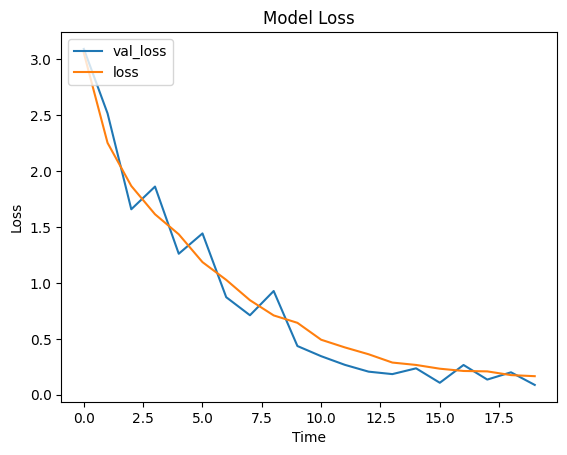

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

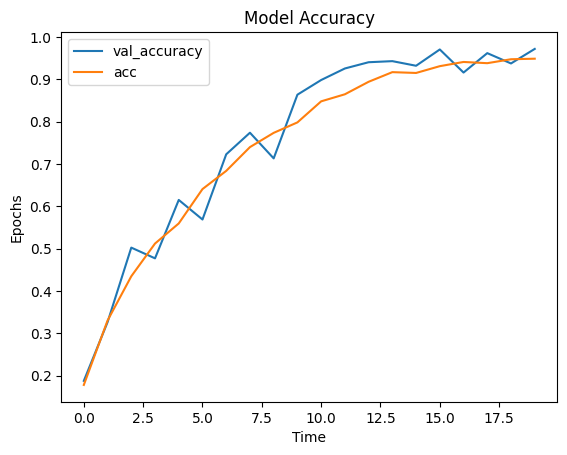

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

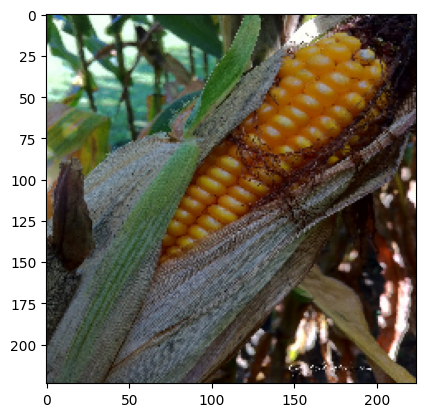

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
Actual: corn
Predicted: corn


In [ ]:
from tensorflow.keras.preprocessing import image
image_path="drive/MyDrive/buah dan sayur/dataset/test/corn/Image_10.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

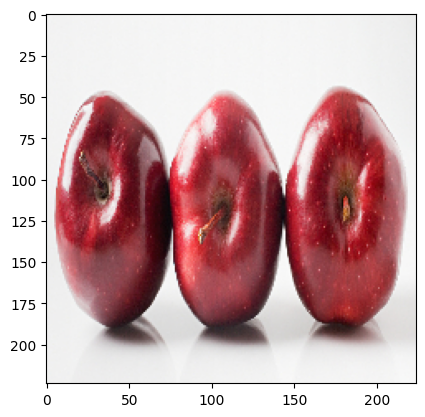

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Actual: apple
Predicted: apple


In [ ]:
from tensorflow.keras.preprocessing import image
image_path="drive/MyDrive/buah dan sayur/dataset/test/apple/Image_3.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

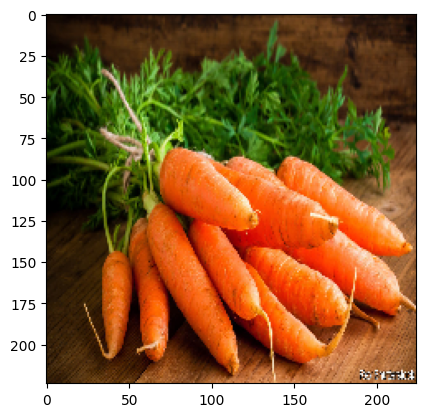

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Actual: carrot
Predicted: carrot


In [ ]:
from tensorflow.keras.preprocessing import image
image_path="drive/MyDrive/buah dan sayur/dataset/test/carrot/Image_10.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

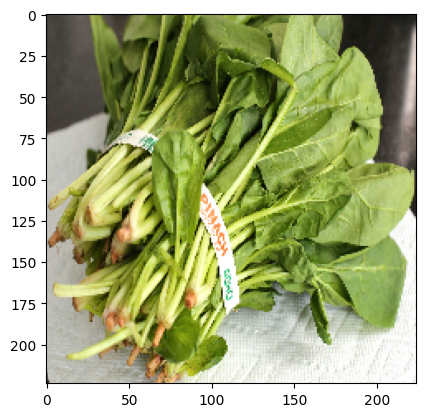

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Actual: spinach
Predicted: spinach


In [ ]:
from tensorflow.keras.preprocessing import image
image_path="drive/MyDrive/buah dan sayur/dataset/test/spinach/Image_1.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

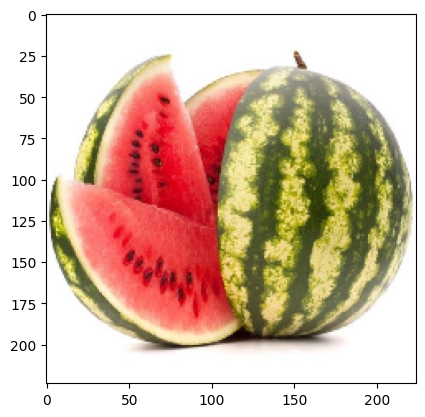

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Actual: watermelon
Predicted: watermelon


In [ ]:
from tensorflow.keras.preprocessing import image
image_path="drive/MyDrive/buah dan sayur/dataset/test/watermelon/Image_6.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

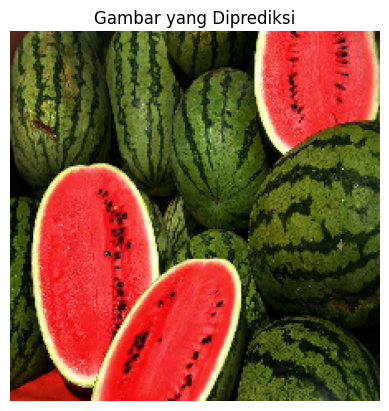

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Actual label: watermelon

🔍 Top-3 Prediction:
watermelon → 99.74%
mango → 0.11%
cucumber → 0.06%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = "drive/MyDrive/buah dan sayur/dataset/test/watermelon/Image_2.jpg"
img = image.load_img(image_path, target_size=(224, 224, 3))
plt.imshow(img)
plt.title("Gambar yang Diprediksi")
plt.axis(False)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
top3_indices = np.argsort(pred[0])[-3:][::-1]  # Ambil 3 skor tertinggi

print(f"Actual label: {image_path.split('/')[-2]}")
print("\n🔍 Top-3 Prediction:")
for i in top3_indices:
    print(f"{class_names[i]} → {pred[0][i]*100:.2f}%")



📊 Akurasi Total: 94.43%
📌 F1-Score (Macro): 0.9435
📌 F1-Score (Weighted): 0.9437

🧾 Classification Report:
               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.78      0.88         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       0.91      1.00      0.95        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.90      0.90      0.90        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       0.75      0.90      0.82        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.80      0.80      0.80        10
       ginger       0.90      0.90      0.90        10
       grapes       1.00      1.00      1.00        10
     jalepe

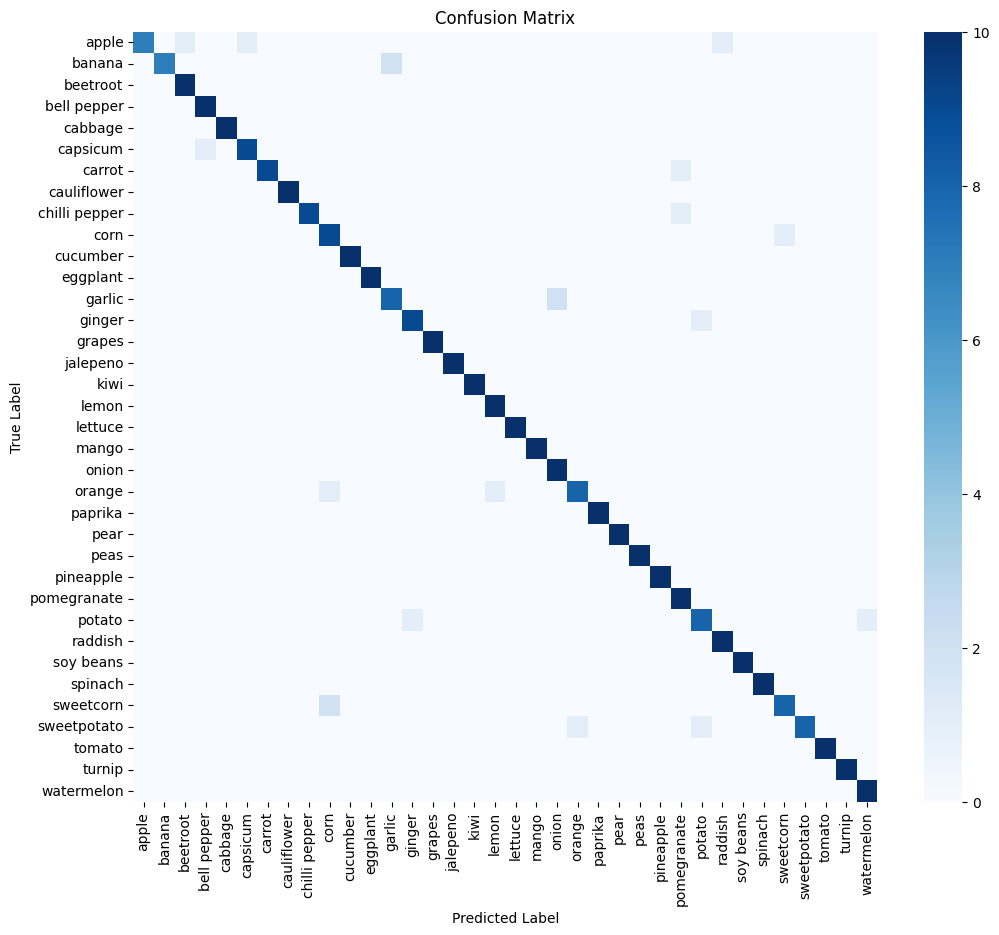

In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path folder test
test_dir = "drive/MyDrive/buah dan sayur/dataset/test"
true_labels = []
predicted_labels = []

# Prediksi semua gambar di test/
for class_name in sorted(os.listdir(test_dir)):
    class_path = os.path.join(test_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)

        try:
            img = image.load_img(file_path, target_size=(224, 224))
            x = image.img_to_array(img)   # ❗ Tidak dibagi 255 karena model tidak pakai normalisasi
            x = np.expand_dims(x, axis=0)

            pred = model.predict(x, verbose=0)
            pred_label = class_names[np.argmax(pred)]

            true_labels.append(class_name)
            predicted_labels.append(pred_label)
        except:
            print(f"❌ Gagal memproses gambar: {file_path}")

# Evaluasi akurasi & F1-Score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

le = LabelEncoder()
le.fit(true_labels + predicted_labels)
true_encoded = le.transform(true_labels)
pred_encoded = le.transform(predicted_labels)

# Akurasi
acc = accuracy_score(true_encoded, pred_encoded)
print(f"\n📊 Akurasi Total: {acc * 100:.2f}%")

# F1-Score
f1_macro = f1_score(true_encoded, pred_encoded, average='macro')
f1_weighted = f1_score(true_encoded, pred_encoded, average='weighted')
print(f"📌 F1-Score (Macro): {f1_macro:.4f}")
print(f"📌 F1-Score (Weighted): {f1_weighted:.4f}")

# Classification report
print("\n🧾 Classification Report:")
print(classification_report(true_encoded, pred_encoded, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(true_encoded, pred_encoded)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
